In [ ]:
from google.colab import drive as gdrive
gdrive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os.path
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import cv2

In [ ]:
data = "/content/drive/MyDrive/dataset/train"

Found 2076 files belonging to 2 classes.
Using 1661 files for training.
Class Names: ['DR', 'No_DR']


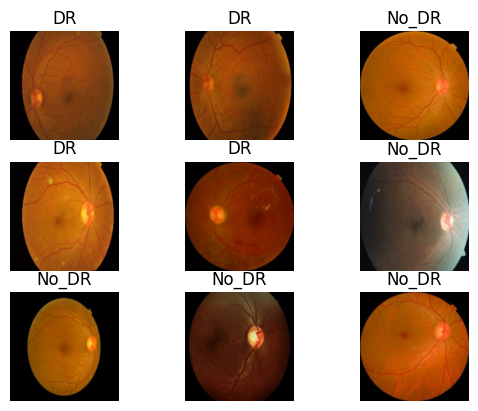

In [ ]:
import tensorflow as tf

# Define your image directory
image_dir = "/content/drive/MyDrive/dataset/train"

# Create image dataset from directory
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    batch_size=32,           # Batch size for training
    image_size=(256, 256),   # Resize images to this size
    shuffle=True,            # Shuffle the dataset
    seed=123,                # Random seed for shuffling
    validation_split=0.2,    # Split dataset into 80% training and 20% validation
    subset="training"        # Specify subset for training
)

# Visualize the class names
class_names = image_dataset.class_names
print("Class Names:", class_names)

# Visualize the first batch of images and labels
for images, labels in image_dataset.take(1):
    for i in range(9):  # Display first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(height_factor=(-0.2, -0.3), width_factor=(-0.2, -0.3), interpolation="bilinear"),
    layers.RandomContrast(factor=0.1),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
],
    name='image',
)

In [ ]:
image_dir = Path(data)

filepaths = list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.jpg'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)
labels

0       No_DR
1       No_DR
2       No_DR
3       No_DR
4       No_DR
        ...  
4147       DR
4148       DR
4149       DR
4150       DR
4151       DR
Name: Label, Length: 4152, dtype: object

In [ ]:
filepaths

0       /content/drive/MyDrive/dataset/train/No_DR/096...
1       /content/drive/MyDrive/dataset/train/No_DR/0ce...
2       /content/drive/MyDrive/dataset/train/No_DR/0cd...
3       /content/drive/MyDrive/dataset/train/No_DR/0d0...
4       /content/drive/MyDrive/dataset/train/No_DR/09f...
                              ...                        
4147    /content/drive/MyDrive/dataset/train/DR/071435...
4148    /content/drive/MyDrive/dataset/train/DR/0953c0...
4149    /content/drive/MyDrive/dataset/train/DR/08a387...
4150    /content/drive/MyDrive/dataset/train/DR/07a3be...
4151    /content/drive/MyDrive/dataset/train/DR/05cd01...
Name: Filepath, Length: 4152, dtype: object

In [ ]:
pathdr = '/content/drive/MyDrive/dataset/train/DR'
pathNdr = '/content/drive/MyDrive/dataset/train/No_DR'
from pathlib import Path

data_dir_path = Path(pathdr)
image_count = len(list(data_dir_path.glob('*.jpg')))
print(f'Total number of images in the DR: {image_count}')

data_dir_path = Path(pathNdr)
image_count = len(list(data_dir_path.glob('*.jpg')))
print(f'Total number of images in the No_dr: {image_count}')

Total number of images in the DR: 1050
Total number of images in the No_dr: 1026


dr Images:


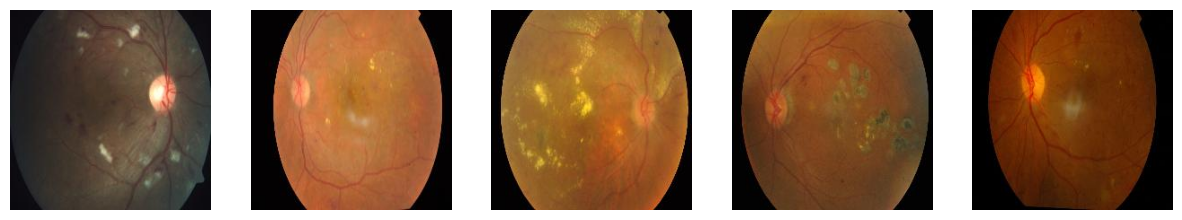

No dr Images:


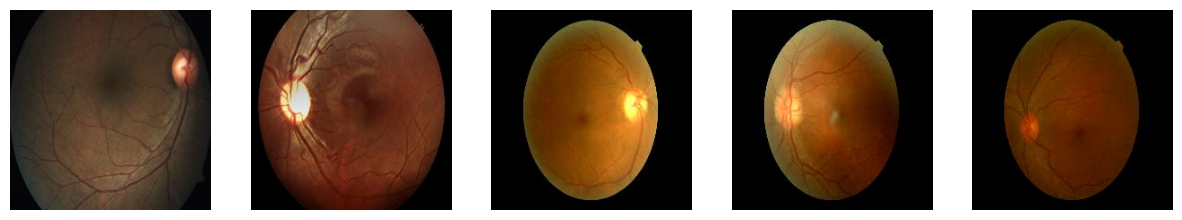

In [ ]:
def display_images_from_path_in_row(path):
    files = os.listdir(path)
    images = [file for file in files if "_mask" not in file]
    num_images = min(len(images), 5)
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        img_path = os.path.join(path, images[i])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

print("dr Images:")
display_images_from_path_in_row(pathdr)
print("No dr Images:")
display_images_from_path_in_row(pathNdr)

In [ ]:
IMAGE_SHAPE = (224, 224)

def prepare_image(file):
    img = image.load_img(file, target_size=IMAGE_SHAPE)
    img_array = image.img_to_array(img)
    return tf.keras.applications.efficientnet.preprocess_input (img_array)

In [ ]:
import glob
directories = os.listdir(data)

files = []
labels = []

for folder in directories:
    fileList = glob.glob(data + '/'+ folder + '/*')
    labels.extend([folder for l in fileList])
    files.extend(fileList)
len(files), len(labels)

(2076, 2076)

In [ ]:
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if 'mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)


len(selected_files), len(selected_labels)

(2076, 2076)

In [ ]:
images = {
    'image': [],
    'target': []
}

for i, (file, label) in enumerate(zip(selected_files, selected_labels)):
    images['image'].append(prepare_image(file))
    images['target'].append(label)

print('Finished.')

Finished.


In [ ]:
images['image'] = np.array(images['image'])
images['target'] = np.array(images['target'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

images['target'] = le.fit_transform(images['target'])

classes = le.classes_
print(f'the target classes are: {classes}')

the target classes are: ['DR' 'No_DR']


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images['image'], images['target'], test_size=.10)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1868, 224, 224, 3), (208, 224, 224, 3), (1868,), (208,))

In [ ]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(*IMAGE_SHAPE, 3),
    classes=3)

base_model.trainable = False
x = base_model.output

# 1st conv block
x = layers.Conv2D(256, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

# 2nd conv block
x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

# 1st FC layer
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# 2nd FC layer
x = layers.Dense(32, activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(.2)(x)

x = layers.Dense(3, 'softmax')(x)

incept_model = keras.models.Model(inputs = base_model.input, outputs = x)

incept_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

incept_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
history = incept_model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
59/59 [==============================] - 1345s 23s/step - loss: 0.5108 - accuracy: 0.8490 - val_loss: 0.6662 - val_accuracy: 0.9038
Epoch 2/10
59/59 [==============================] - 1325s 22s/step - loss: 0.2085 - accuracy: 0.9556 - val_loss: 0.5421 - val_accuracy: 0.9471
Epoch 3/10
59/59 [==============================] - 1337s 23s/step - loss: 0.1379 - accuracy: 0.9657 - val_loss: 0.4231 - val_accuracy: 0.9135
Epoch 4/10
59/59 [==============================] - 1338s 23s/step - loss: 0.1148 - accuracy: 0.9711 - val_loss: 0.2011 - val_accuracy: 0.9615
Epoch 5/10
59/59 [==============================] - 1325s 22s/step - loss: 0.0820 - accuracy: 0.9786 - val_loss: 0.1326 - val_accuracy: 0.9615
Epoch 6/10
59/59 [==============================] - 1316s 22s/step - loss: 0.0630 - accuracy: 0.9829 - val_loss: 0.1726 - val_accuracy: 0.9663
Epoch 7/10
59/59 [==============================] - 1324s 23s/step - loss: 0.0742 - accuracy: 0.9738 - val_loss: 0.1411 - val_accuracy: 0.9615

In [ ]:
incept_model.evaluate(x=x_test, y = y_test, batch_size=32, verbose=1)

7/7 [==============================] - 131s 18s/step - loss: 0.1757 - accuracy: 0.9615


[0.175663560628891, 0.9615384340286255]

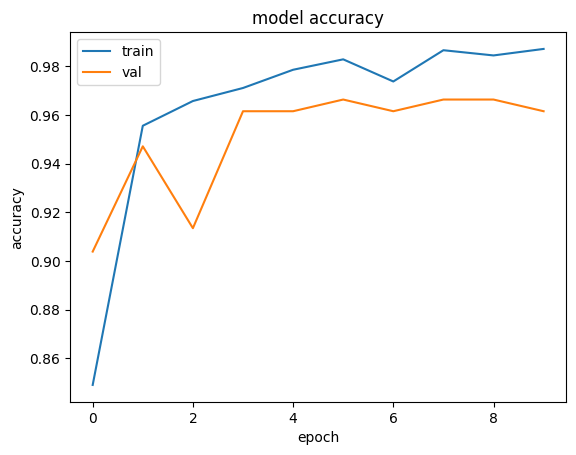

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def predict_image(img_path, label):
    img1 = prepare_image(img_path)
    res = incept_model.predict(np.expand_dims(img1, axis = 0))
    pred = classes[np.argmax(res)]

    img = image.load_img(img_path)
    plt.imshow(np.array(img))
    plt.title(f'True: {label}\nPredicted: {pred}')

In [ ]:
def Conv2dBlock(inputTensor, numFilters, kernelSize = 3, doBatchNorm = True):
    #first Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (inputTensor)

    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x =tf.keras.layers.Activation('relu')(x)

    #Second Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (x)
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Activation('relu')(x)

    return x


def Unet(inputImage, numFilters = 16, droupouts = 0.1, doBatchNorm = True):
    # defining encoder Path
    c1 = Conv2dBlock(inputImage, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    p1 = tf.keras.layers.Dropout(droupouts)(p1)

    c2 = Conv2dBlock(p1, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    p2 = tf.keras.layers.Dropout(droupouts)(p2)

    c3 = Conv2dBlock(p2, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    p3 = tf.keras.layers.Dropout(droupouts)(p3)
    c4 = Conv2dBlock(p3, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
    p4 = tf.keras.layers.Dropout(droupouts)(p4)

    c5 = Conv2dBlock(p4, numFilters * 16, kernelSize = 3, doBatchNorm = doBatchNorm)

    # defining decoder path
    u6 = tf.keras.layers.Conv2DTranspose(numFilters*8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    u6 = tf.keras.layers.Dropout(droupouts)(u6)
    c6 = Conv2dBlock(u6, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)

    u7 = tf.keras.layers.Conv2DTranspose(numFilters*4, (3, 3), strides = (2, 2), padding = 'same')(c6)

    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(droupouts)(u7)
    c7 = Conv2dBlock(u7, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)

    u8 = tf.keras.layers.Conv2DTranspose(numFilters*2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(droupouts)(u8)
    c8 = Conv2dBlock(u8, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)

    u9 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(droupouts)(u9)
    c9 = Conv2dBlock(u9, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)

    output = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c9)
    model = tf.keras.Model(inputs = [inputImage], outputs = [output])
    return model


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_test,predicted)
conf

array([[107,   7],
       [  1,  93]])

In [ ]:
predicted = []
for item in incept_model.predict(x_test):
    predicted.append(np.argmax(item))

7/7 [==============================] - 132s 18s/step


1/1 [==============================] - 2s 2s/step


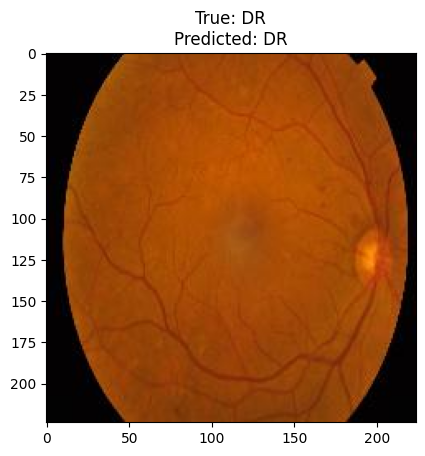

In [ ]:
predict_image(data + '/DR/1df3e03a8f5f_png.rf.7004f3f20bb461aeba6d627aaa4b6cc3.jpg', 'DR')

1/1 [==============================] - 1s 920ms/step


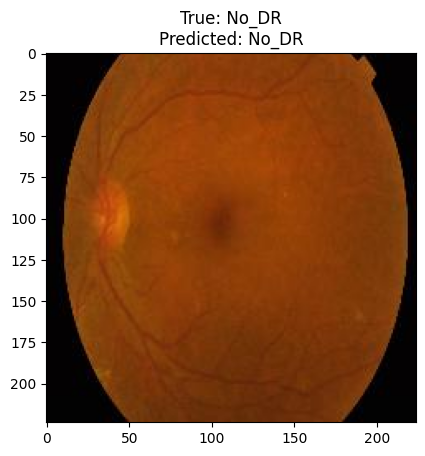

In [ ]:
predict_image(data + '/No_DR/0babc12807b2_png.rf.c90ad911ec42c9da59a84595f1259f69.jpg', 'No_DR')